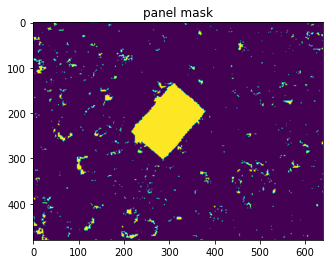

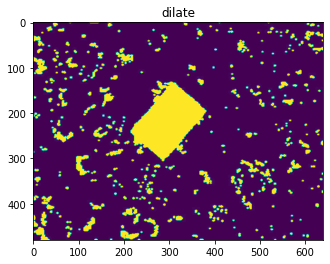

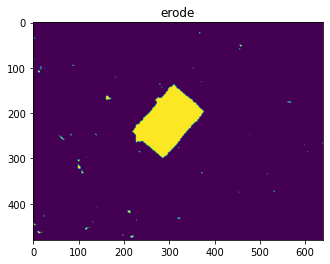

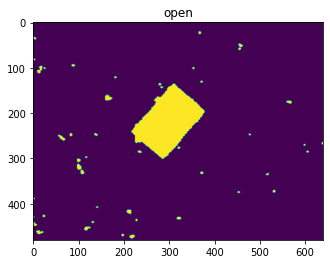

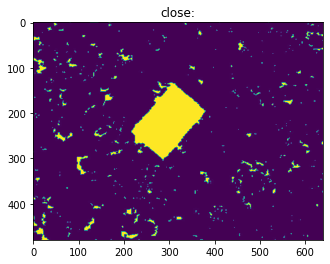

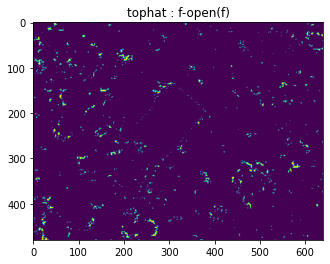

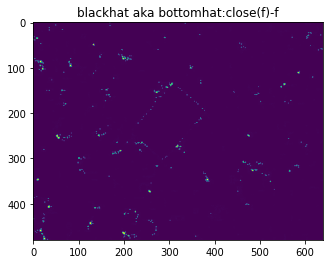

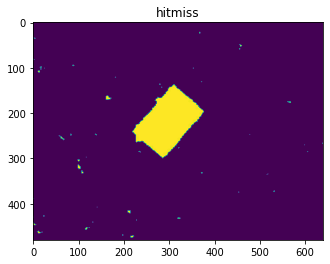

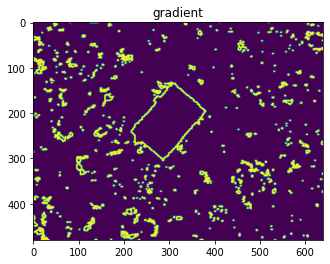

In [29]:
%run ../foregroundFoo.ipynb

panelMask=cv.imread('../../../images/test/carpet/panelMask.jpg',0)
plt.title('panel mask');plt.imshow(panelMask);plt.show()

kern_dim=5
kernel=cv.getStructuringElement(cv.MORPH_ELLIPSE,(kern_dim,kern_dim))

plt.title('dilate')
dilated=cv.dilate(panelMask.copy(),kernel,iterations=1)
plt.imshow(dilated);plt.show()
# plt.imshow(cv.morphologyEx(panelMask.copy(), cv.MORPH_DILATE, kernel));plt.show()##it=1
plt.title('erode')
eroded=cv.erode(panelMask.copy(),kernel,iterations=1)
plt.imshow(eroded);plt.show()
# plt.imshow(cv.morphologyEx(panelMask.copy(), cv.MORPH_ERODE, kernel));plt.show()##it=1
plt.title('open')
opened=cv.morphologyEx(panelMask.copy(), cv.MORPH_OPEN, kernel)
plt.imshow(opened);plt.show()
plt.title('close:')
closed=cv.morphologyEx(panelMask.copy(), cv.MORPH_CLOSE, kernel)
plt.imshow(closed);plt.show()
plt.title('tophat : f-open(f)')
tophatted=cv.morphologyEx(panelMask.copy(), cv.MORPH_TOPHAT, kernel)
plt.imshow(tophatted);plt.show()
plt.title('blackhat aka bottomhat:close(f)-f')
blackatted=cv.morphologyEx(panelMask.copy(), cv.MORPH_BLACKHAT, kernel)
plt.imshow(blackatted);plt.show()
plt.title('hitmiss')
hitmissed=cv.morphologyEx(panelMask.copy(), cv.MORPH_HITMISS, kernel)
plt.imshow(hitmissed);plt.show()
plt.title('gradient')
gradiented=cv.morphologyEx(panelMask.copy(), cv.MORPH_GRADIENT, kernel)
plt.imshow(gradiented);plt.show()


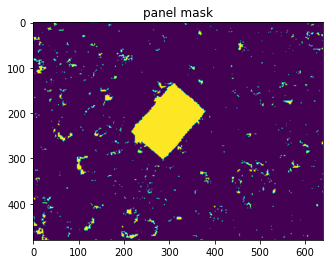

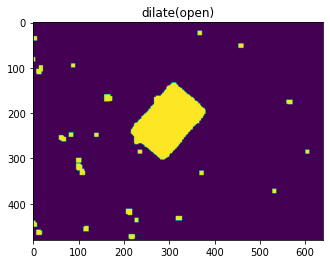

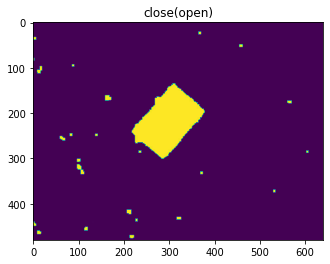

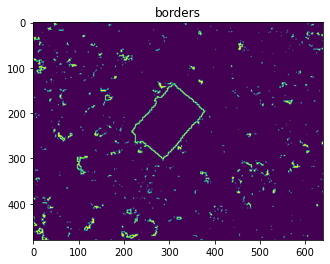

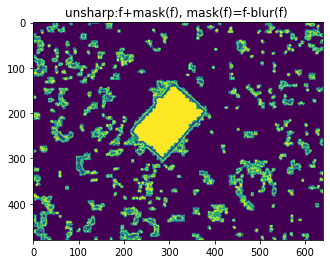

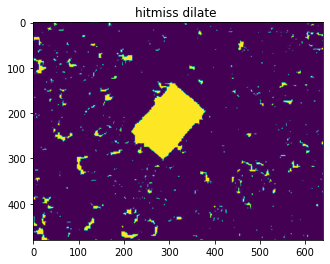

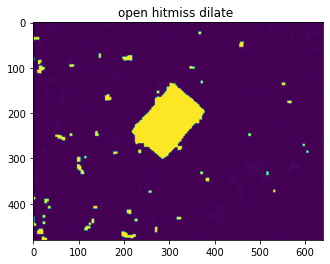

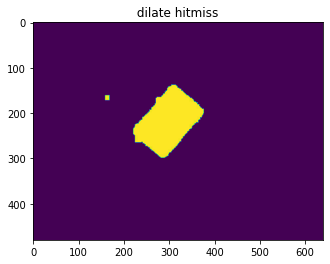

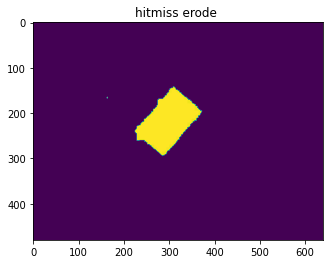

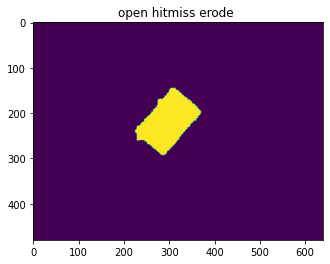

In [19]:
plt.title('panel mask');plt.imshow(panelMask);plt.show()

kern_dim=5
kernel=cv.getStructuringElement(cv.MORPH_RECT,(kern_dim,kern_dim))
# kernel = np.ones((kern_dim,kern_dim),np.uint8)

plt.title('dilate(open)')
dilopened=cv.dilate(opened,kernel,iterations=1)
plt.imshow(dilopened);plt.show()

plt.title('close(open)')
clopened=cv.morphologyEx(opened, cv.MORPH_CLOSE, kernel)
plt.imshow(clopened);plt.show()

plt.title('borders')
bordered=panelMask.copy()-eroded
plt.imshow(bordered);plt.show()
##actually image-erosion(image) not working

plt.title('unsharp:f+mask(f), mask(f)=f-blur(f) ')
unsharped=panelMask.copy()-cv.blur(panelMask.copy(),(kern_dim,kern_dim))+panelMask.copy()
plt.imshow(unsharped);plt.show()

plt.title('hitmiss dilate ')
hitlated=cv.morphologyEx((dilated),cv.MORPH_HITMISS, kernel)
plt.imshow(hitlated);plt.show()

plt.title('open hitmiss dilate ')
ophitlated=cv.morphologyEx(hitlated, cv.MORPH_OPEN, kernel)
plt.imshow(ophitlated);plt.show()


plt.title(' dilate hitmiss ')
dilhitted=cv.dilate(cv.morphologyEx(hitmissed, cv.MORPH_OPEN, kernel),kernel,iterations=1)
plt.imshow(dilhitted);plt.show()

plt.title('hitmiss erode ')
hitroded=cv.morphologyEx(eroded,cv.MORPH_HITMISS, kernel)
plt.imshow(hitroded);plt.show()

plt.title('open hitmiss erode ')
ophitroded=cv.morphologyEx(hitroded, cv.MORPH_OPEN, kernel)
plt.imshow(ophitroded);plt.show()


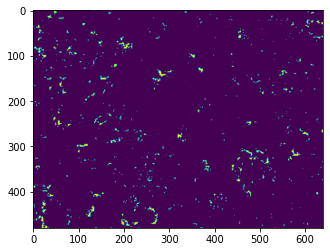

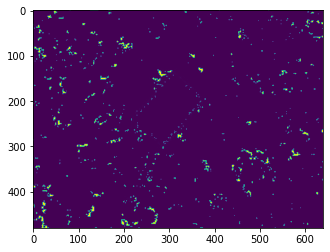

In [20]:
plt.imshow(panelMask.copy()-opened);plt.show()
plt.imshow(panelMask.copy()-clopened);plt.show()

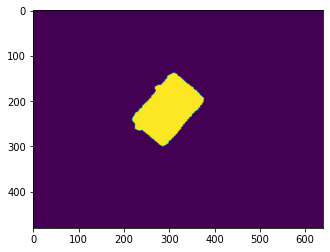

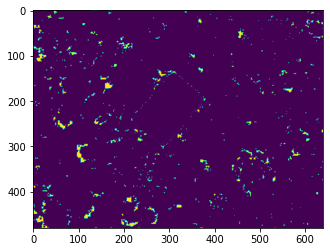

In [32]:
numiter=3
result=cv.dilate(cv.erode(panelMask,kernel,iterations=numiter),kernel,iterations=numiter)
plt.imshow(result);plt.show()
plt.imshow(panelMask-result);plt.show()